<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Project 1: Optimizing Manpower Expenses for STB using Rainfall data
#### Data analysis of Singapore's weather and number of visitors to local attractions

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


## Problem Statement

It is widely recognized that rainfall, humidity, and temperature significantly influence the daily activities of people living in Singapore and impact their choice of places to visit.
<br>  Singapore Tourism Board (STB) has been facing steady increase of operating expenses, resulting in a greater deficit. It reported a deficit on SGD 7MM deficit in 2021 and this increased to SGD 51MM in 2022**, of which 6MM increase comes from Expense on Manpower. If this trend persists, STB might need to close down some of its attractions. The management has identified that there has been a particularly high increase in manpower costs for the Singapore Zoo and Science Center. 
<br> Therefore, STB would like to investigate if there is a possibility to **reduce their expenditure on manpower**. 
<br> Studying the **correlation between weather data and number of visitors** to make more efficient manpower decisions, such as adjusting the number of staff on shift has been identified as one of the low hanging fruits. For example, if bad weather like high rainfall results in lower number of visitors, STB can employ less staff, hence reducing expenditure on manpower.
<br> By maintaining the ratio of staff on shift to visitor count, customer service quality levels will remain unaffected.
<br> If this recommendation is successful, management would like to share this with other local attractions as well.

##### Questions to be answered:

1. Is there any correlation between total rainfall and the number visitors to the Singapore Zoo and Science Centre?
2. Given that the Singapore Zoo is an outdoor attraction, does the total rainfall have a greater impact on its number of visitors as compared to the Science Centre?
3. Is there any other weather features that might be a predictor of number of visitors?


***https://www.stb.gov.sg/content/dam/stb/documents/annualreports/Singapore%20Tourism%20Board_Annual%20Report%202021-2022%20.pdf (Page 122 for overall deficit, Page 148, No. 21 for employee's wages and salaries)*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:

def calc_mean(values):
    n = len(values)
    print(sum(values)/n)
    
    
calc_mean([1,2,4])

2.3333333333333335


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
values = [1,2,4]

In [3]:
# Code:

def calc_std(values):
    n = len(values)
    mean = sum(values)/n
    var = sum((x - mean)**2 for x in values) / n
    std = var**0.5
    print(std)
    
calc_std(values)

1.247219128924647


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
# Imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import statsmodels.formula.api as sm
import statsmodels.api as sm

import scipy.stats as stats
import scipy

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from datetime import datetime

plt.rcdefaults()
%matplotlib inline

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
# Load dataset with No. of Rainy days per month:
raindays = pd.read_csv("../data/number-of-rainy-days.csv")
raindays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             497 non-null    object
 1   no_of_rainy_days  497 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [6]:
# Load dataset with total monthly rainfall:
rainfall = pd.read_csv("../data/rainfall-monthly-total.csv")
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           497 non-null    object 
 1   total_rainfall  497 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [7]:
# Load dataset with minimum surface air temp:

temp = pd.read_csv("../data/surface-air-temp-monthly-mean.csv")
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      497 non-null    object 
 1   mean_temp  497 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [8]:
# Load dataset with relative humidity:

humidity = pd.read_csv("../data/relative-humidity-monthly-mean.csv")
humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    498 non-null    object 
 1   mean_rh  498 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [9]:
# Load dataset with average sunshine mean daily duration:

sunshine = pd.read_csv("../data/sunshine-duration-monthly-mean-daily-duration.csv")
sunshine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              498 non-null    object 
 1   mean_sunshine_hrs  498 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [10]:
# All dataframes contain the month column in the same format, and begin from 1982-01, hence merge all dataframes to proceed with analysis.

df = pd.merge(raindays, rainfall, on = 'month')
df = pd.merge(df, humidity, on = 'month')
df = pd.merge(df, temp, on = 'month')
df = pd.merge(df, sunshine, on = 'month')

df

month  no_of_rainy_days  total_rainfall  mean_rh  mean_temp  \
0    1982-01                10           107.1     81.2       25.9   
1    1982-02                 5            27.8     79.5       27.1   
2    1982-03                11           160.8     82.3       27.2   
3    1982-04                14           157.0     85.9       27.0   
4    1982-05                10           102.2     83.2       28.0   
..       ...               ...             ...      ...        ...   
492  2023-01                22           302.6     81.9       26.5   
493  2023-02                13           324.4     79.4       26.9   
494  2023-03                12           243.4     79.2       27.1   
495  2023-04                19           222.8     77.4       28.5   
496  2023-05                11           112.8     73.7       29.5   

     mean_sunshine_hrs  
0                  5.6  
1                  7.6  
2                  5.1  
3                  4.7  
4                  5.8  
..                 ...  
492                4.4  
493                5.1  
494                6.0  
495                5.8  
496                6.6  

[497 rows x 6 columns]

In [11]:
# convert month column to datetime column
df['month']= pd.to_datetime(df['month'])

In [12]:
# Load dataset with monthly no. of visitors across different attractions
visitors = pd.read_excel("../data/outdoor-activites-singapore.xlsx",skiprows=9)
visitors.head()

Data Series Asian Civilisations Museum (Thousand)  \
0    2023 Feb                                  31.4   
1    2023 Jan                                  33.4   
2    2022 Dec                                  27.1   
3    2022 Nov                                  32.7   
4    2022 Oct                                  39.1   

  National Museum Of Singapore (Thousand) Singapore Art Museum (Thousand)  \
0                                    65.7                               0   
1                                    71.3                               0   
2                                    72.5                               0   
3                                      73                               0   
4                                    82.2                               0   

  Peranakan Museum (Thousand)  Science Centre Singapore (Thousand)  \
0                        18.8                                 18.5   
1                           0                                 25.0   
2                           0                                 49.7   
3                           0                                 29.8   
4                           0                                 33.9   

  Jurong Birdpark (Thousand) Night Safari (Thousand) River Wonders (Thousand)  \
0                         na                    49.1                     47.2   
1                       18.9                    56.2                     57.6   
2                      108.5                    70.8                     79.6   
3                       44.3                    44.9                     57.4   
4                       28.4                    56.9                     60.4   

   Singapore Zoological Gardens (Thousand)  \
0                                     75.5   
1                                     83.9   
2                                    131.1   
3                                     88.1   
4                                    110.8   

   Chinese/Japanese Gardens (Thousand)  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

  Sun Yat Sen Nanyang Memorial Hall (Thousand)  \
0                                          5.6   
1                                          8.9   
2                                          2.7   
3                                          2.8   
4                                          3.9   

  Indian Heritage Centre (Thousand) Malay Heritage Centre (Thousand)  \
0                              11.5                                0   
1                              21.2                                0   
2                               6.1                                0   
3                               9.9                                0   
4                              32.6                             36.6   

  Children's Museum Singapore (Thousand) Changi Chapel And Museum (Thousand)  \
0                                   10.8                                   5   
1                                   10.5                                 3.4   
2                                     na                                  na   
3                                     na                                  na   
4                                     na                                  na   

  Reflections At Bukit Chandu (Thousand)  
0                                    4.1  
1                                    2.7  
2                                     na  
3                                     na  
4                                     na

In [13]:
# From visitors.head(), we can see the date column is not formatted in the same format as the other datasets.
# Hence Rename date column to date and convert it to date format


visitors.rename(columns = {'Data Series':'year_month'}, inplace =True)
visitors['year_month'] = visitors['year_month'].str.strip()
visitors['Year'] = visitors['year_month'].str.extract(r'(\d{4})')
visitors['Month'] = visitors['year_month'].str.extract(r'([a-zA-Z]+)')

# Encoding of months to numeric values

# Define a dictionary mapping months to numeric values
month_to_num = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}

# Convert the 'Month' column to corresponding month values 
visitors['Month'] = visitors['Month'].map(month_to_num)

# Create a new 'Date' column by combining year and month
visitors['Date'] = visitors['Year'] + '-' + visitors['Month']
visitors['Date']= pd.to_datetime(visitors['Date'])

# Drop unwanted date columns
visitors = visitors.drop(columns=['Month','Year', 'year_month'])
visitors.head(5)

Asian Civilisations Museum (Thousand)  \
0                                  31.4   
1                                  33.4   
2                                  27.1   
3                                  32.7   
4                                  39.1   

  National Museum Of Singapore (Thousand) Singapore Art Museum (Thousand)  \
0                                    65.7                               0   
1                                    71.3                               0   
2                                    72.5                               0   
3                                      73                               0   
4                                    82.2                               0   

  Peranakan Museum (Thousand)  Science Centre Singapore (Thousand)  \
0                        18.8                                 18.5   
1                           0                                 25.0   
2                           0                                 49.7   
3                           0                                 29.8   
4                           0                                 33.9   

  Jurong Birdpark (Thousand) Night Safari (Thousand) River Wonders (Thousand)  \
0                         na                    49.1                     47.2   
1                       18.9                    56.2                     57.6   
2                      108.5                    70.8                     79.6   
3                       44.3                    44.9                     57.4   
4                       28.4                    56.9                     60.4   

   Singapore Zoological Gardens (Thousand)  \
0                                     75.5   
1                                     83.9   
2                                    131.1   
3                                     88.1   
4                                    110.8   

   Chinese/Japanese Gardens (Thousand)  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

  Sun Yat Sen Nanyang Memorial Hall (Thousand)  \
0                                          5.6   
1                                          8.9   
2                                          2.7   
3                                          2.8   
4                                          3.9   

  Indian Heritage Centre (Thousand) Malay Heritage Centre (Thousand)  \
0                              11.5                                0   
1                              21.2                                0   
2                               6.1                                0   
3                               9.9                                0   
4                              32.6                             36.6   

  Children's Museum Singapore (Thousand) Changi Chapel And Museum (Thousand)  \
0                                   10.8                                   5   
1                                   10.5                                 3.4   
2                                     na                                  na   
3                                     na                                  na   
4                                     na                                  na   

  Reflections At Bukit Chandu (Thousand)       Date  
0                                    4.1 2023-02-01  
1                                    2.7 2023-01-01  
2                                     na 2022-12-01  
3                                     na 2022-11-01  
4                                     na 2022-10-01

In [14]:
# Combine both dataframes on month column

df_combine = pd.merge(df, visitors, left_on = 'month', right_on = 'Date')
df_combine['month']= pd.to_datetime(df_combine['month'])

df_combine.tail()

month  no_of_rainy_days  total_rainfall  mean_rh  mean_temp  \
390 2022-10-01                27           279.0     78.7       27.6   
391 2022-11-01                26           313.8     79.9       27.4   
392 2022-12-01                19           215.4     81.2       26.8   
393 2023-01-01                22           302.6     81.9       26.5   
394 2023-02-01                13           324.4     79.4       26.9   

     mean_sunshine_hrs Asian Civilisations Museum (Thousand)  \
390                3.5                                  39.1   
391                3.8                                  32.7   
392                3.6                                  27.1   
393                4.4                                  33.4   
394                5.1                                  31.4   

    National Museum Of Singapore (Thousand) Singapore Art Museum (Thousand)  \
390                                    82.2                               0   
391                                      73                               0   
392                                    72.5                               0   
393                                    71.3                               0   
394                                    65.7                               0   

    Peranakan Museum (Thousand)  ...  River Wonders (Thousand)  \
390                           0  ...                      60.4   
391                           0  ...                      57.4   
392                           0  ...                      79.6   
393                           0  ...                      57.6   
394                        18.8  ...                      47.2   

    Singapore Zoological Gardens (Thousand)  \
390                                   110.8   
391                                    88.1   
392                                   131.1   
393                                    83.9   
394                                    75.5   

    Chinese/Japanese Gardens (Thousand)  \
390                                 0.0   
391                                 0.0   
392                                 0.0   
393                                 0.0   
394                                 0.0   

    Sun Yat Sen Nanyang Memorial Hall (Thousand)  \
390                                          3.9   
391                                          2.8   
392                                          2.7   
393                                          8.9   
394                                          5.6   

     Indian Heritage Centre (Thousand)  Malay Heritage Centre (Thousand)  \
390                               32.6                              36.6   
391                                9.9                                 0   
392                                6.1                                 0   
393                               21.2                                 0   
394                               11.5                                 0   

    Children's Museum Singapore (Thousand)  \
390                                     na   
391                                     na   
392                                     na   
393                                   10.5   
394                                   10.8   

    Changi Chapel And Museum (Thousand)  \
390                                  na   
391                                  na   
392                                  na   
393                                 3.4   
394                                   5   

    Reflections At Bukit Chandu (Thousand)       Date  
390                                     na 2022-10-01  
391                                     na 2022-11-01  
392                                     na 2022-12-01  
393                                    2.7 2023-01-01  
394                                    4.1 2023-02-01  

[5 rows x 23 columns]

In [15]:
# Split month column into year and month for easier analysis
df_combine['year_month'] = df_combine['month']
df_combine['month'] = df_combine['year_month'].dt.month
df_combine['year'] = df_combine['year_month'].dt.year

# Keep relevant columns and rename them. Keep number of visitors for zoo and science centre for further analysis to see if trends differ for indoor vs outdoor activities.
df_combine = df_combine[['year_month','year', 'month', 'no_of_rainy_days', 'total_rainfall','mean_rh', 'mean_temp', 'mean_sunshine_hrs','Singapore Zoological Gardens (Thousand)','Science Centre Singapore (Thousand)']]
df_combine = df_combine.rename(columns={"Singapore Zoological Gardens (Thousand)": "zoo_visitor_ct", "Science Centre Singapore (Thousand)": "sci_centre_visitor_ct"})
df_combine['year_month'] = df_combine['year_month'].dt.strftime('%Y-%m')


In [16]:
# Check for missing values
df_combine.isnull().sum()

year_month               0
year                     0
month                    0
no_of_rainy_days         0
total_rainfall           0
mean_rh                  0
mean_temp                0
mean_sunshine_hrs        0
zoo_visitor_ct           0
sci_centre_visitor_ct    0
dtype: int64

In [17]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year_month             395 non-null    object 
 1   year                   395 non-null    int64  
 2   month                  395 non-null    int64  
 3   no_of_rainy_days       395 non-null    int64  
 4   total_rainfall         395 non-null    float64
 5   mean_rh                395 non-null    float64
 6   mean_temp              395 non-null    float64
 7   mean_sunshine_hrs      395 non-null    float64
 8   zoo_visitor_ct         395 non-null    float64
 9   sci_centre_visitor_ct  395 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 33.9+ KB


Based on the above info, data is clean as there are no null values, hence no need for imputation or dropping of rows for now. 

In [18]:
# Scale the rainfall data

columns_to_scale = ['total_rainfall','mean_temp','zoo_visitor_ct']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_combine[columns_to_scale])


In [19]:
# df_combine['rainfall_scaled'] = scaled_data[:, 0]
# df_combine['temp_scaled'] = scaled_data[:, 1]
# df_combine['zoo_visitor_scaled'] = scaled_data[:, 2]


# df_combine

### Data Dictionary


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year_month**|*float*|all|Year and month of data collection| 
|**year**|*integer*|all|Year of data collection| 
|**month**|*integer*|all|Month of data collection| 
|**no_of_rainy_days**|*integer*|number-of-rainy-days|Number of days that rained (day with rainfall amount of 0.2mm or more) in a month recorded at the Changi Climate Station| 
|**total_rainfall**|*float*|rainfall-monthly-total|Total rainfall in mm recorded at the Changi Climate Station| 
|**mean_rh**|*float*|relative-humidity-monthly-mean|Monthly mean relative humidity recorded at the Changi Climate Station (units in percentage, where 80 represents 80%)| 
|**temp_mean_daily_min**|*float*|surface-air-temp-monthly-mean|Monthly mean air temperature recorded at the Changi Climate Station (units in degrees celcius)| 
|**mean_sunshine_hrs**|*float*|sunshine-duration-monthly-mean-daily-duration|Monthly mean sunshine hours in a day recorded at the Changi Climate Station| 
|**zoo_visitor_ct**|*float*|outdoor-activites-singapore|Total number of visitors to the zoo (units in thousands, where 2.5 represents 2500 people)| 
|**sci_centre_visitor_ct**|*float*|outdoor-activites-singapore|Total number of visitors to the science centre (units in thousands, where 2.5 represents 2500 people)| 



## Exploratory Data Analysis

After combining the datasets, we perform EDA to become familiar with the data. Purpose is to understand the distribution of weather variables, detect patterns, outliers, and relationships between how weather data might affect the number of visitors. 

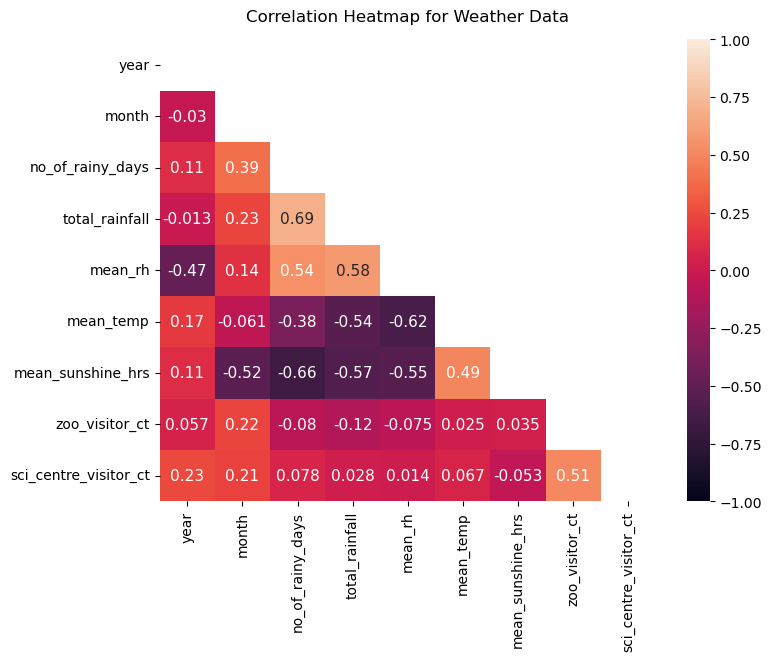

In [20]:
f, ax = plt.subplots(figsize=(8, 6))
mask = np.triu(np.ones_like(df_combine.corr(numeric_only=True), dtype=np.bool_))
heatmap = sns.heatmap(df_combine.corr(numeric_only=True), mask=mask, vmin=-1, vmax=1, annot=True,
                      annot_kws={"size": 11}) 
heatmap.set_xlabel(heatmap.get_xlabel(), fontsize=7)
heatmap.set_ylabel(heatmap.get_ylabel(), fontsize=7)
heatmap.set_title('Correlation Heatmap for Weather Data', fontdict={'fontsize': 12}, pad=13)


plt.show()

#### 1) Summary Statistics

In [21]:
# summary statistics for each year
df_combine.groupby(['month'])['no_of_rainy_days'].describe()

count       mean       std   min   25%   50%   75%   max
month                                                          
1       33.0  13.636364  5.951986   3.0   9.0  13.0  19.0  25.0
2       33.0   8.696970  5.120332   1.0   5.0   8.0  11.0  22.0
3       32.0  12.437500  5.272800   5.0   8.0  11.0  16.0  22.0
4       33.0  14.818182  3.441062   9.0  13.0  14.0  18.0  21.0
5       33.0  14.272727  3.502434   6.0  12.0  13.0  17.0  23.0
6       33.0  13.363636  3.435278   8.0  11.0  13.0  16.0  21.0
7       33.0  13.606061  4.182847   6.0  10.0  14.0  16.0  22.0
8       33.0  14.121212  4.052450   6.0  12.0  13.0  18.0  24.0
9       33.0  12.727273  4.273996   3.0  10.0  13.0  15.0  19.0
10      33.0  15.272727  4.881552   5.0  12.0  16.0  19.0  27.0
11      33.0  19.303030  3.892981  11.0  16.0  19.0  22.0  27.0
12      33.0  19.030303  2.866671  14.0  17.0  19.0  21.0  24.0

We can see that Months 11 and 12 (Nov and Dec) have higher number of rainy days, which is expected as it is known as the rainy season in Singapore.

#### 2) Standard Deviations of all columns


In [22]:
summary_stats = df_combine.describe()
summary_stats

year       month  no_of_rainy_days  total_rainfall     mean_rh  \
count   395.000000  395.000000        395.000000      395.000000  395.000000   
mean   2006.207595    6.508861         14.278481      177.973924   81.975949   
std       9.518480    3.456297          5.052357      112.569972    3.556663   
min    1990.000000    1.000000          1.000000        0.200000   72.000000   
25%    1998.000000    4.000000         11.000000       96.300000   79.700000   
50%    2006.000000    7.000000         14.000000      162.000000   82.300000   
75%    2014.000000    9.500000         18.000000      239.700000   84.600000   
max    2023.000000   12.000000         27.000000      765.900000   90.700000   

        mean_temp  mean_sunshine_hrs  zoo_visitor_ct  sci_centre_visitor_ct  
count  395.000000         395.000000      395.000000             395.000000  
mean    27.792405           5.683038      118.774430              59.140253  
std      0.759537           1.200060       30.921874              30.803249  
min     25.500000           3.000000        0.000000               0.000000  
25%     27.300000           4.800000      100.600000              36.450000  
50%     27.900000           5.700000      118.300000              54.600000  
75%     28.300000           6.500000      134.800000              77.850000  
max     29.500000           9.200000      233.000000             191.400000

Based on the above summary statistics, we can see that minimum number of visitors for both zoo and science centre are 0 - this will be addressed later on

#### 3a) Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?

In [23]:
# Filter to only years 1990, 2000, 2010, 2020

df_filtered = df_combine.loc[df_combine['year'].isin([1990, 2000, 2010, 2020])]
df_filtered = df_filtered[['year','month','total_rainfall']].reset_index(drop=True)

# months with max rainfall
idx = df_filtered.groupby(['year'])['total_rainfall'].transform(max) == df_filtered['total_rainfall']
max_rainfall_months = df_filtered[idx].reset_index(drop=True).rename(columns={"month": "max_month", "total_rainfall":"max_rainfall"})


# months with min rainfall
idx = df_filtered.groupby(['year'])['total_rainfall'].transform(min) == df_filtered['total_rainfall']
min_rainfall_months = df_filtered[idx].reset_index(drop=True).rename(columns={"month": "min_month","total_rainfall":"min_rainfall"})


In [24]:
# Join the two tables together to present findings

df_rainfall = pd.merge(min_rainfall_months,max_rainfall_months, on = 'year')
df_rainfall

year  min_month  min_rainfall  max_month  max_rainfall
0  1990          4          52.4          9         204.5
1  2000          9          81.1         11         385.7
2  2010          2           6.3          7         298.5
3  2020          2          65.0          5         255.6

#### 3b) Which year have the highest and lowest total rainfall in the date range of analysis?

In [25]:
min_year = df_combine.groupby(['year']).agg(total_rainfall= ('total_rainfall', 'sum')).reset_index(). min()
max_year = df_combine.groupby(['year']).agg(total_rainfall= ('total_rainfall', 'sum')).reset_index().max()

min_year[0]

print(f"Year with highest rainfall is {round(max_year[0])} with {max_year[1]} mm and year with lowest rainfall is {round(min_year[0])} with {min_year[1]} mm")

Year with highest rainfall is 2023 with 2886.2 mm and year with lowest rainfall is 1990 with 627.0 mm


#### 3c) Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?

In [26]:
df_combine.head()

year_month  year  month  no_of_rainy_days  total_rainfall  mean_rh  \
0    1990-04  1990      4                10            52.4     81.2   
1    1990-05  1990      5                11           180.1     81.1   
2    1990-06  1990      6                 9           112.6     80.7   
3    1990-07  1990      7                12           124.0     82.7   
4    1990-08  1990      8                13           146.6     82.3   

   mean_temp  mean_sunshine_hrs  zoo_visitor_ct  sci_centre_visitor_ct  
0       28.5                6.3           100.9                   41.8  
1       28.6                6.5           115.6                   56.3  
2       28.3                6.3           107.3                   84.1  
3       27.5                5.9            98.7                   40.4  
4       28.0                5.8           102.4                   44.6

In [27]:
# Filter to only years 1990, 2000, 2010, 2020

df2_filtered = df_combine.loc[df_combine['year'].isin([1990, 2000, 2010, 2020])]
df2_filtered = df2_filtered[['year','month','no_of_rainy_days']].reset_index(drop=True)

# months with highest no. of rainy days
idx = df2_filtered.groupby(['year'])['no_of_rainy_days'].transform(max) == df2_filtered['no_of_rainy_days']
max_rain_days = df2_filtered[idx].reset_index(drop=True).rename(columns={"month": "max_month", "no_of_rainy_days":"max_rainy_days"})


# months with lowest no. of rainy days
idx = df2_filtered.groupby(['year'])['no_of_rainy_days'].transform(min) == df2_filtered['no_of_rainy_days']
min_rain_days = df2_filtered[idx].reset_index(drop=True).rename(columns={"month": "min_month","no_of_rainy_days":"min_rainy_days"})


In [28]:
# Just like above in 3a, merge dataframes to present findings clearly

df_rainy_days = pd.merge(min_rain_days,max_rain_days, on = 'year')
df_rainy_days

year  min_month  min_rainy_days  max_month  max_rainy_days
0  1990          6               9          9              17
1  1990          6               9         11              17
2  2000          5              10         11              21
3  2010          2               4         11              21
4  2020          1               6          7              22

In 1990, there were 2 months (Sep and Nov) that tied in place for the most number of rainy days.

#### 3d) Which year have the highest and lowest number of rainy days in the date range of analysis?

In [29]:
min_year = df_combine.groupby(['year']).agg(rainy_days= ('no_of_rainy_days', 'sum')).reset_index(). min()
max_year = df_combine.groupby(['year']).agg(rainy_days= ('no_of_rainy_days', 'sum')).reset_index().max()

min_year[0]

print(f"Year with highest no. of rainy days is {round(max_year[0])} with {max_year[1]} days and year with lowest no. of rainy days is {round(min_year[0])} with {min_year[1]} days")

Year with highest no. of rainy days is 2023 with 210 days and year with lowest no. of rainy days is 1990 with 35 days


From 3b and 3d, seems like there is a big discrepancy between the years with highest and lowest rainfall.
Hence, it might make more sense to look at data in more recent years.

#### 4) Plotting histograms to understand distribution of data

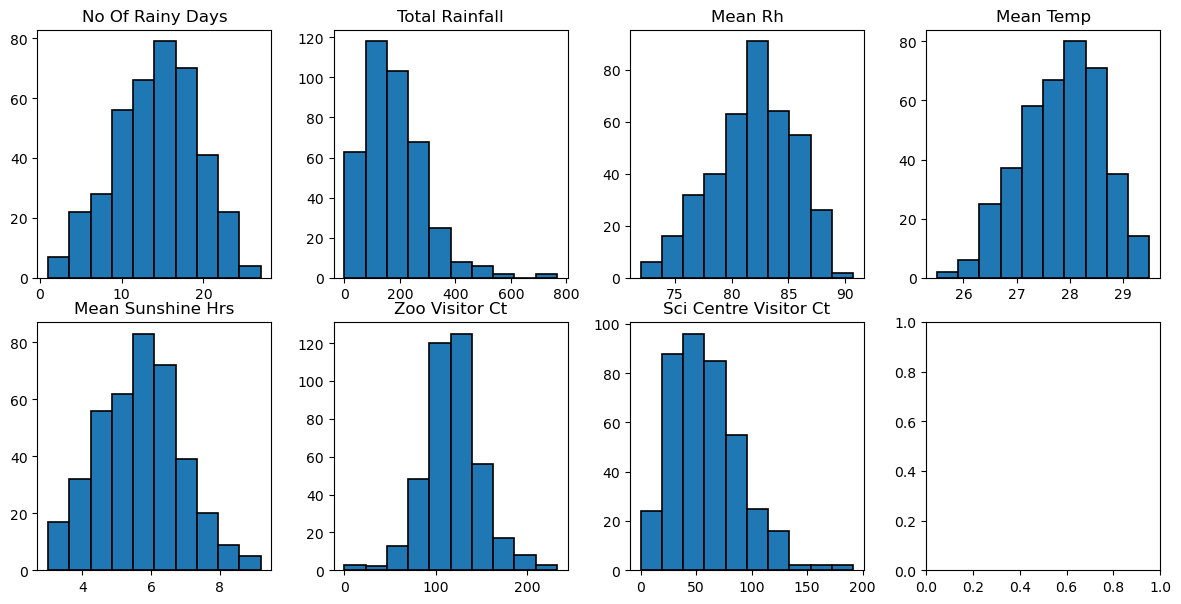

In [30]:
# Function to plot histograms

def plot_histograms(df):
    columns = ['no_of_rainy_days', 'total_rainfall', 'mean_rh', 'mean_temp',
               'mean_sunshine_hrs', 'zoo_visitor_ct', 'sci_centre_visitor_ct']
    
    num_rows = 2
    num_cols = 4
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6))
    fig.tight_layout()

    for i, col in enumerate(columns):
        row_index = i // num_cols
        col_index = i % num_cols
        axs[row_index, col_index].hist(df[col], edgecolor='black', linewidth=1.2)
        axs[row_index, col_index].set_title(col.replace('_', ' ').title())

    plt.show()

plot_histograms(df_combine)

Based on above histograms, we can see that the no. of rainy days, mean relative humidity and daily minimum temperature are normally distributed.
Total rainfall is skewed right.

#### 4a) Checking of outliers for rainfall

Text(0.5, 1.0, 'Spread of total_rainfall across different months')

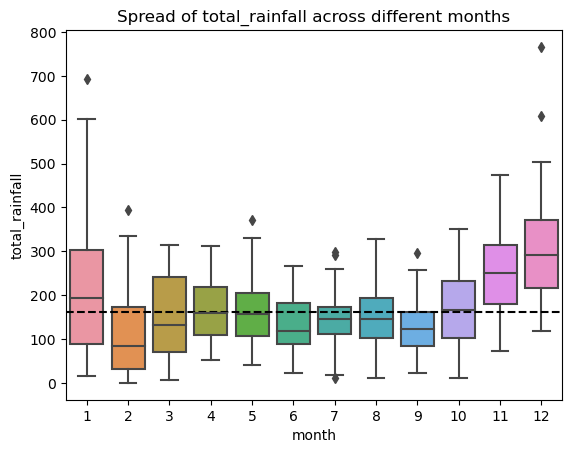

In [31]:
# Boxplot to see distribution of rainfall, along with overall median line

sns.boxplot(data = df_combine, y = "total_rainfall", x = 'month')
plt.axhline(np.median(df_combine['total_rainfall']), color='black', linestyle='--')
plt.title('Spread of total_rainfall across different months')

# Seems like there might be some outliers in the months of December and January

In [32]:
# Detect and remove outliers using IQR

# Calculate the upper and lower limits
Q1 = df_combine['total_rainfall'].quantile(0.25)
Q3 = df_combine['total_rainfall'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create a boolean mask for outliers
outlier_mask = (df_combine['total_rainfall'] >= lower) & (df_combine['total_rainfall'] <= upper)

# Filter out the outliers
df_new = df_combine[outlier_mask]

In [33]:
# Compare old vs new shape after removal of outliers

print("Old Shape: ", df_combine.shape)

# Print the new shape of the DataFrame
print("New Shape: ", df_new.shape)

# 10 rows were dropped

Old Shape:  (395, 10)
New Shape:  (385, 10)



Now, we plot a polar chart to see distribution of rainfall across the months:

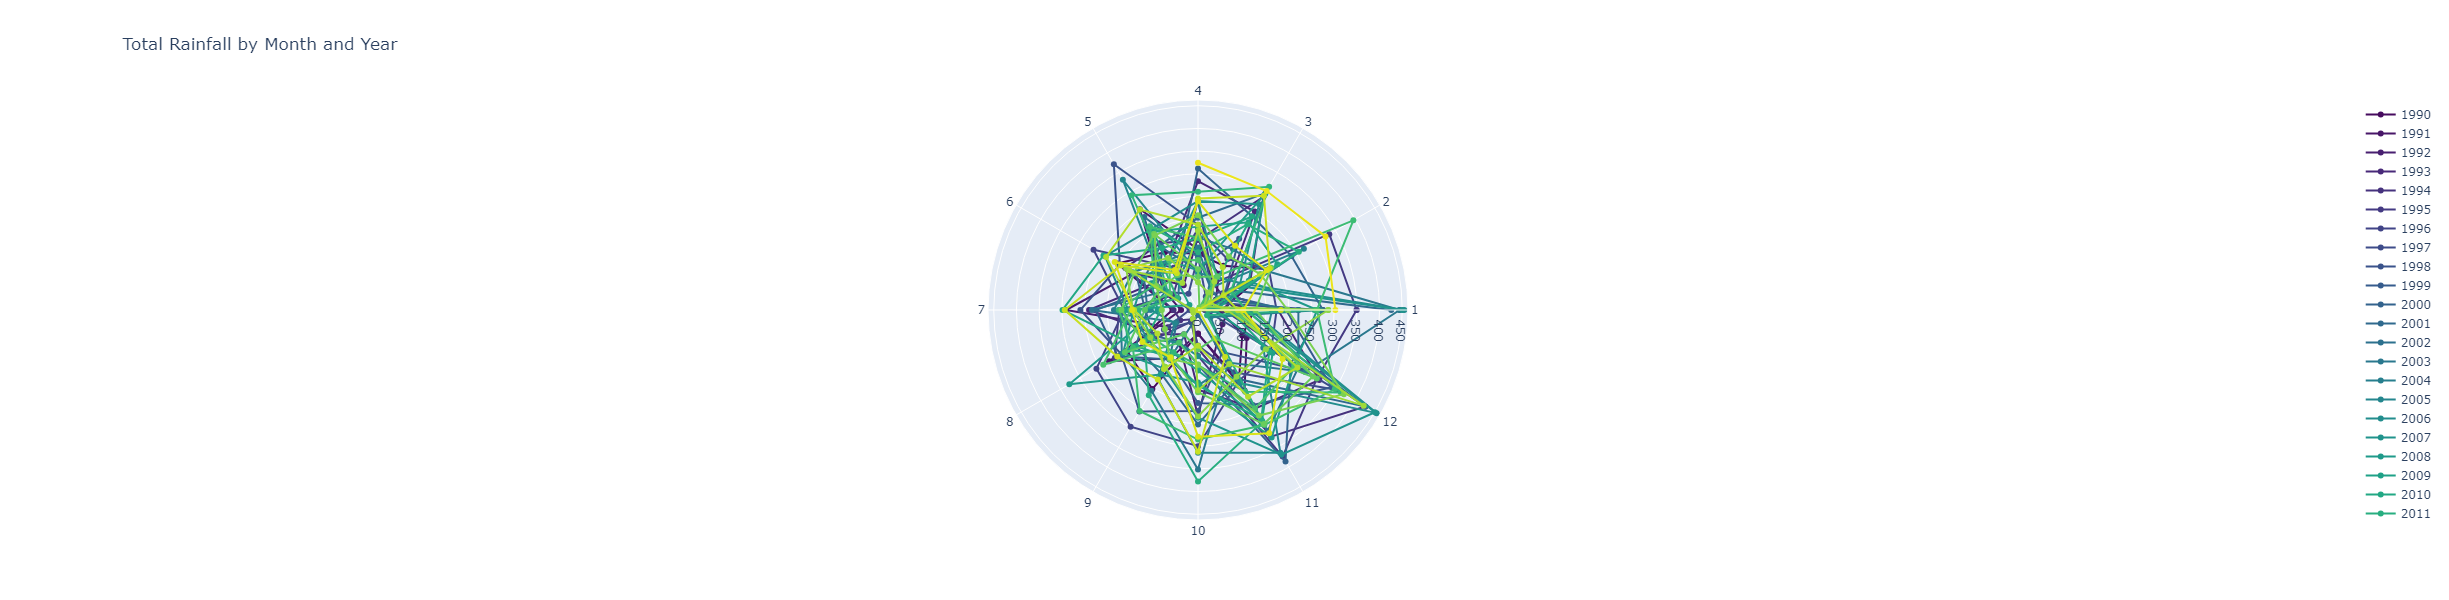

In [34]:
months = [str(i) for i in list(set(df_new.month))] + ['1']
years = list(set(df_new.year))
pal = list(sns.color_palette(palette='viridis',
                             n_colors=len(years)).as_hex())

fig = go.Figure()
for i,c in zip(years,pal):
    df = df_new[df_new['year']==i]
    val = list(df.total_rainfall)*2
    fig.add_trace(go.Scatterpolar(r=val, theta=months,
                                  name=i, marker=dict(color=c)))
fig.update_layout(title='Total Rainfall by Month and Year', height=600)


Based on the above polar chart, we can see most that months with the highest amount of rainfall are in November, December and January

In [35]:
df_new.head()

year_month  year  month  no_of_rainy_days  total_rainfall  mean_rh  \
0    1990-04  1990      4                10            52.4     81.2   
1    1990-05  1990      5                11           180.1     81.1   
2    1990-06  1990      6                 9           112.6     80.7   
3    1990-07  1990      7                12           124.0     82.7   
4    1990-08  1990      8                13           146.6     82.3   

   mean_temp  mean_sunshine_hrs  zoo_visitor_ct  sci_centre_visitor_ct  
0       28.5                6.3           100.9                   41.8  
1       28.6                6.5           115.6                   56.3  
2       28.3                6.3           107.3                   84.1  
3       27.5                5.9            98.7                   40.4  
4       28.0                5.8           102.4                   44.6

#### 5) Plotting weather data across years to see climate trends

##### 5a) Temperature

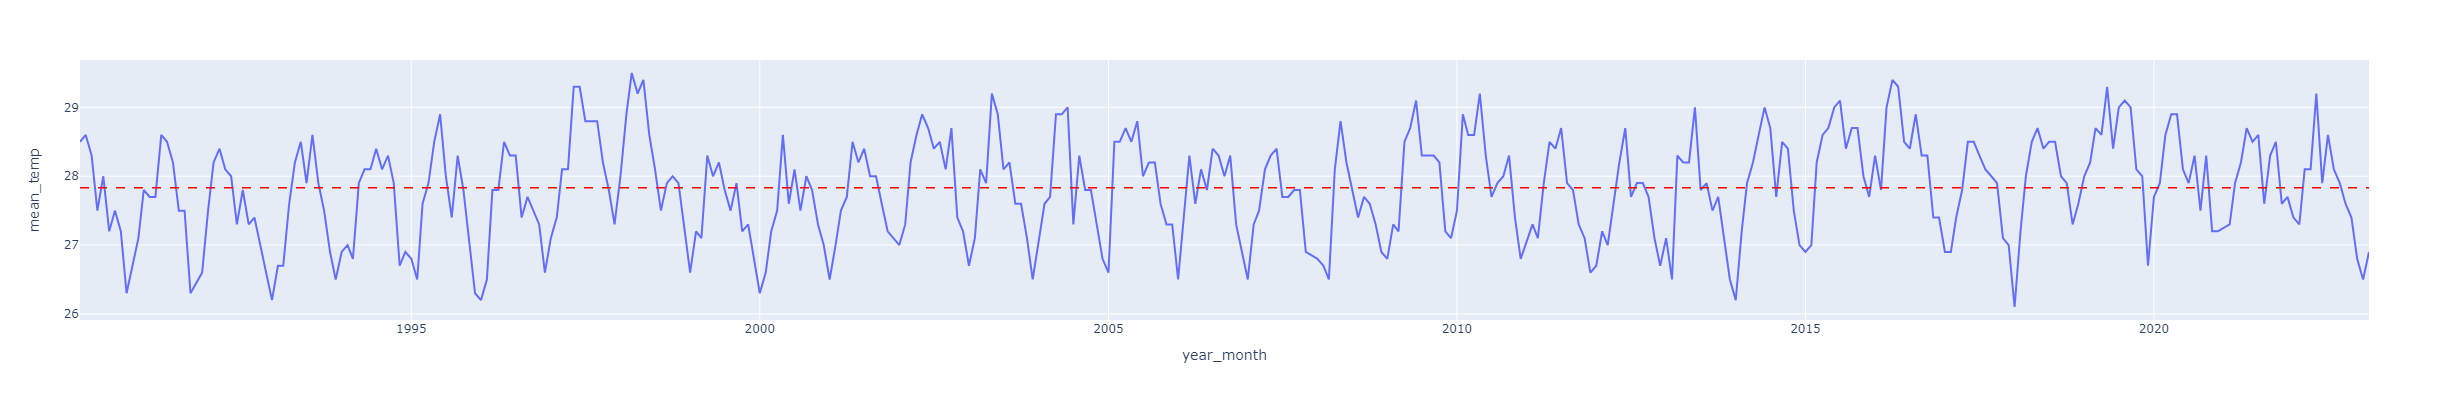

In [36]:
fig = px.line(df_new, x='year_month', y='mean_temp')
mean = df_new['mean_temp'].mean()
fig.add_hline(y=mean, line_width=1.5,
              line_dash='dash', line_color='red')

fig.update_layout(width=800, height=400,showlegend=False)

##### 5b) Total Rainfall

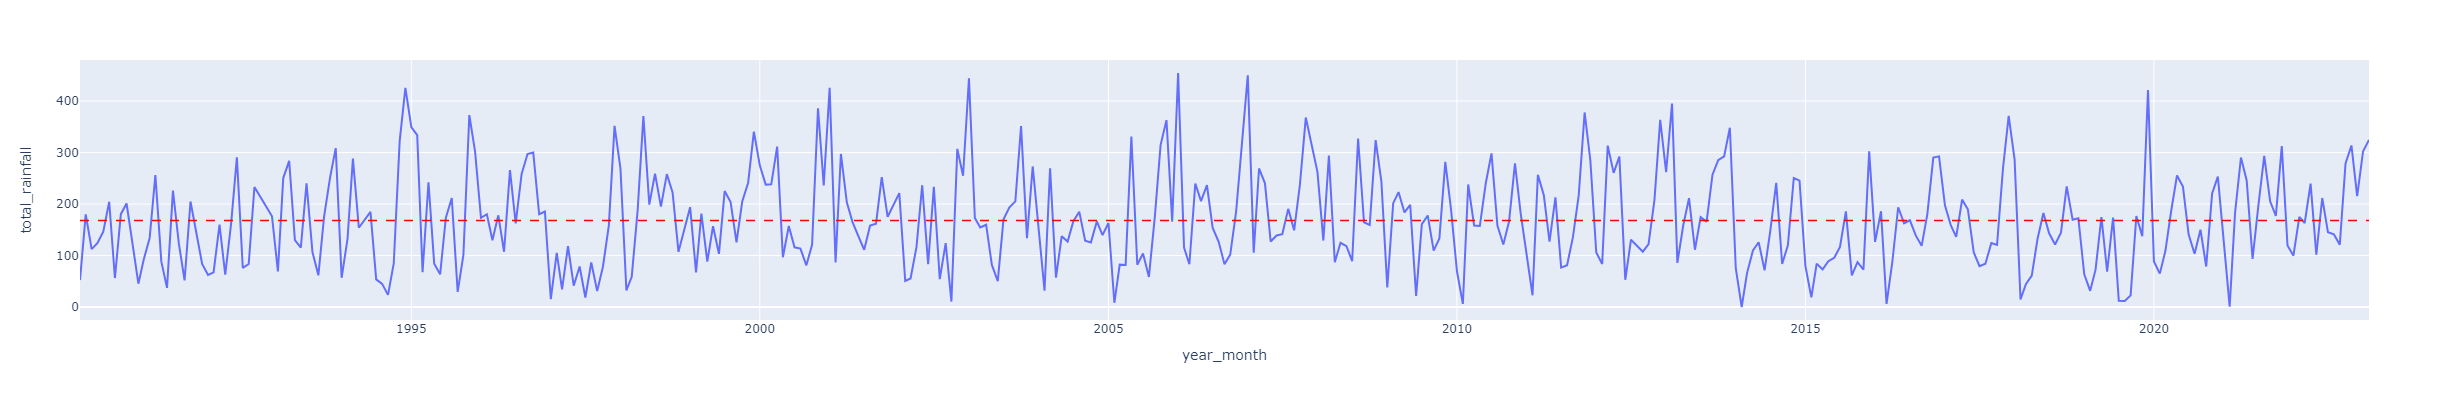

In [37]:
fig = px.line(df_new, x='year_month', y='total_rainfall')
mean = df_new['total_rainfall'].mean()
fig.add_hline(y=mean, line_width=1.5,
              line_dash='dash', line_color='red')

fig.update_layout(width=800, height=400,showlegend=False)

##### 5c) Mean Relative Humidity

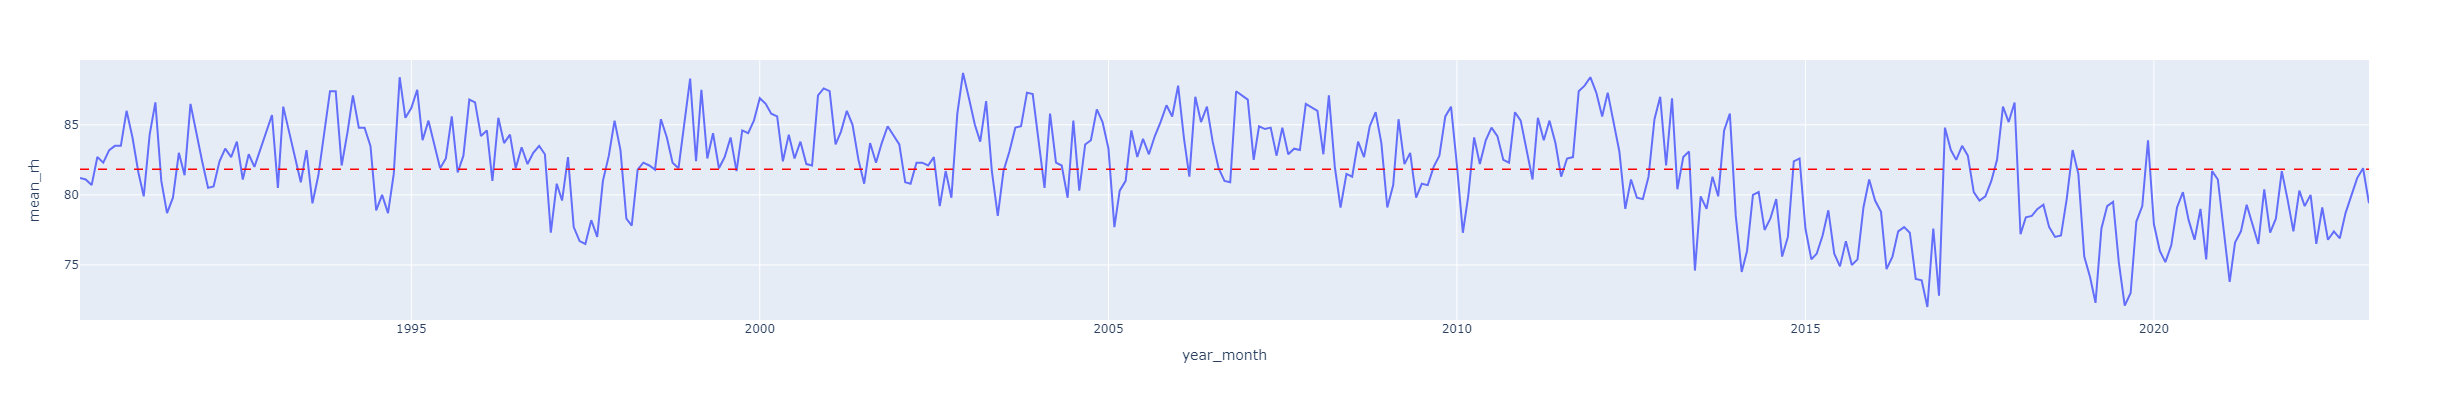

In [38]:
fig = px.line(df_new, x='year_month', y='mean_rh')
mean = df_new['mean_rh'].mean()
fig.add_hline(y=mean, line_width=1.5,
              line_dash='dash', line_color='red')
fig.update_layout(width=800, height=400,showlegend=False)

##### 5d) Mean Sunshine Hours

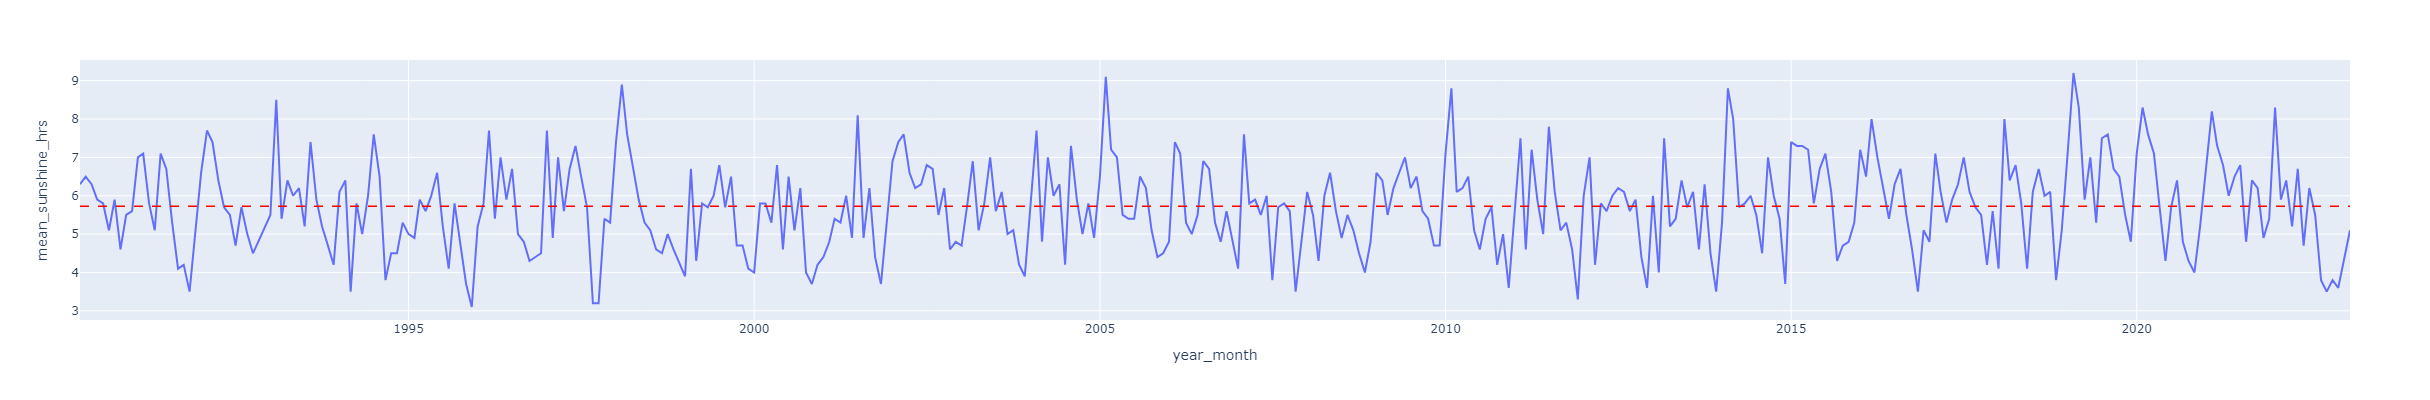

In [39]:
fig = px.line(df_new, x='year_month', y='mean_sunshine_hrs')
mean = df_new['mean_sunshine_hrs'].mean()
fig.add_hline(y=mean, line_width=1.5,
              line_dash='dash', line_color='red')
fig.update_layout(width=800, height=400,showlegend=False)

**Conclusion**: For the features total rainfall, minimum surface temperature and mean daily sunshine hours, it seems like there was no major change across all the years. For humidity, it seems like there was a drop in relative humidity since 2015 as the levels have been consistently below the median line (in red).

Therefore, analysis across the months will be focused on total rainfall, minimum surface temperature and mean daily sunshine hours.

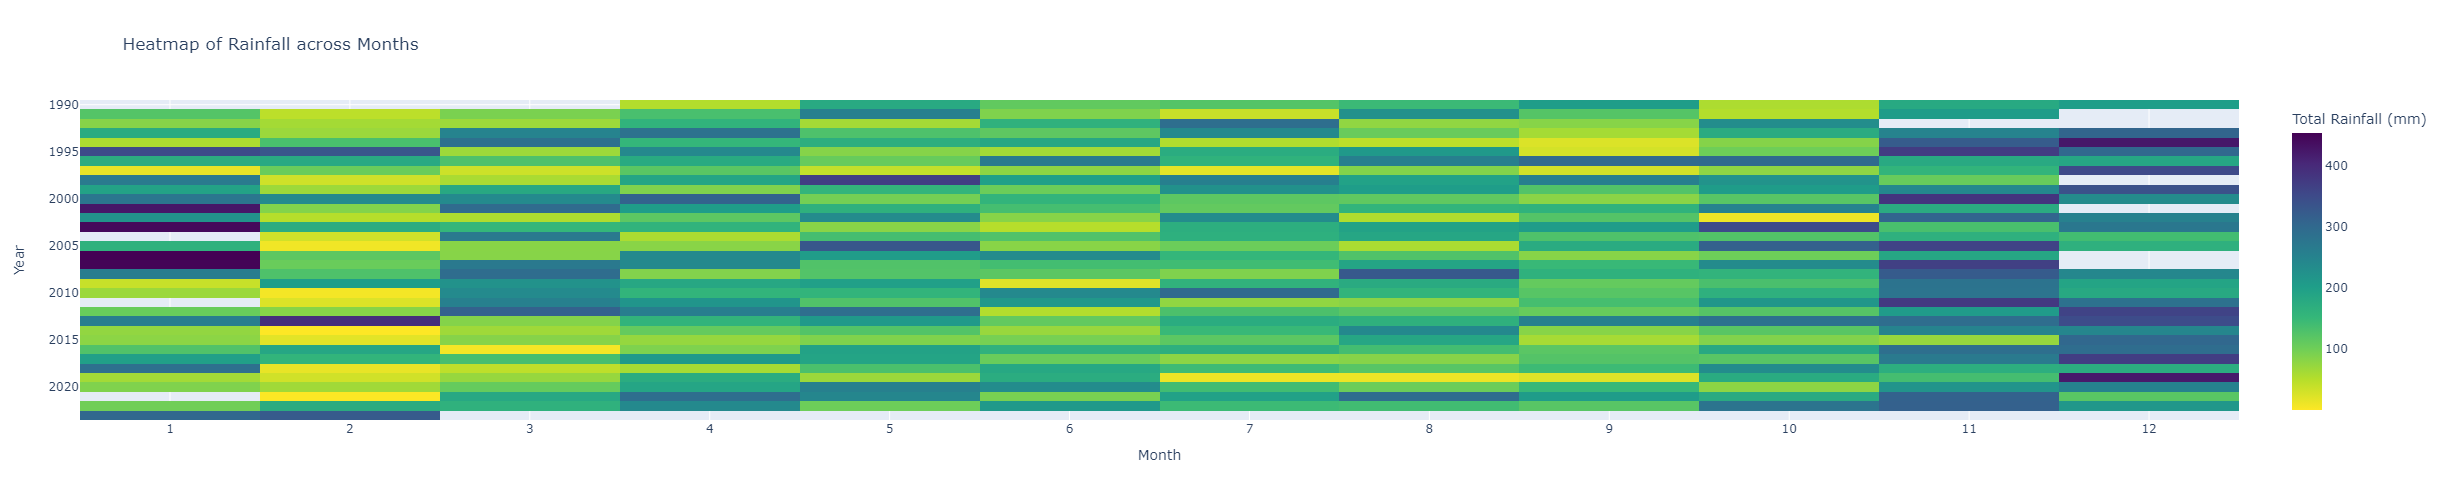

In [40]:
# First, unstack the dataframe
df_cross = df_new.set_index(['year','month'])['total_rainfall'].unstack()

fig = px.imshow(df_cross, height=500, aspect='auto', color_continuous_scale='viridis_r', 
                title="Heatmap of Rainfall across Months")


# Set the axis labels
fig.update_xaxes(title_text='Month',tickmode='array', tickvals=list(range(1, 13)))
fig.update_yaxes(title_text='Year')

# Set the color bar label for temperature
fig.update_layout(coloraxis_colorbar=dict(title="Total Rainfall (mm)"))

## Data Visualization & further Processing

After doing the basic data cleaning like checking of nulls and removal of outliers, we will now doing data visualizations and further data processing if required.

### 1) Impact of Covid on number of visitors

#### 1a) Studying trend of visitors across the years

C:\Users\tiffa\AppData\Local\Temp\ipykernel_157808\1075511868.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'No. of visitors (thousands)')

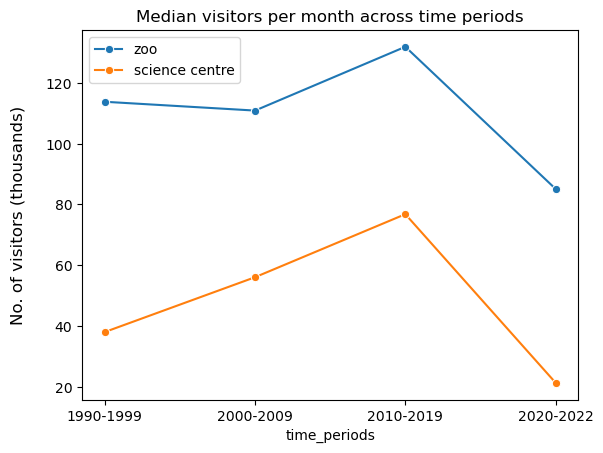

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df_new' and contains the necessary data

# Convert the 'year' column to a datetime object
df_new['year'] = pd.to_datetime(df_new['year'], format='%Y')

# Define the bins for the periods (1990 to 1999, 2000 to 2009, 2010 to 2019)
periods = [(pd.to_datetime('1990-01-01'), pd.to_datetime('1999-12-31')),
           (pd.to_datetime('2000-01-01'), pd.to_datetime('2009-12-31')),
           (pd.to_datetime('2010-01-01'), pd.to_datetime('2019-12-31')),
           (pd.to_datetime('2020-01-01'), pd.to_datetime('2023-01-31'))]

# Group the data by year and sum the number of visitors for each period for both columns
df_grouped = df_new.groupby(pd.cut(df_new['year'], bins=[period[0] for period in periods] + [pd.to_datetime('2023-01-31')], right=False)).agg({
    'zoo_visitor_ct': 'median',
    'sci_centre_visitor_ct': 'median'
}).reset_index()

# Function to map periods to desired renamed periods
def map_periods(period):
    start, end = period.left.year, period.right.year
    return f"{start}-{end-1}" if start != end else f"{start}"

# Add a new column with the renamed periods
df_grouped['time_periods'] = df_grouped['year'].apply(map_periods)

# Plot line chart to show median number of visitors across the decades
sns.lineplot(data = df_grouped, x = 'time_periods', y = 'zoo_visitor_ct', marker = 'o', label = 'zoo')
sns.lineplot(data = df_grouped, x = 'time_periods', y = 'sci_centre_visitor_ct', marker = 'o', label = 'science centre')
plt.title('Median visitors per month across time periods')
plt.ylabel('No. of visitors (thousands)', fontsize=12, labelpad=15)


Text(0.5, 1.0, 'No. of visitors to attractions across all years')

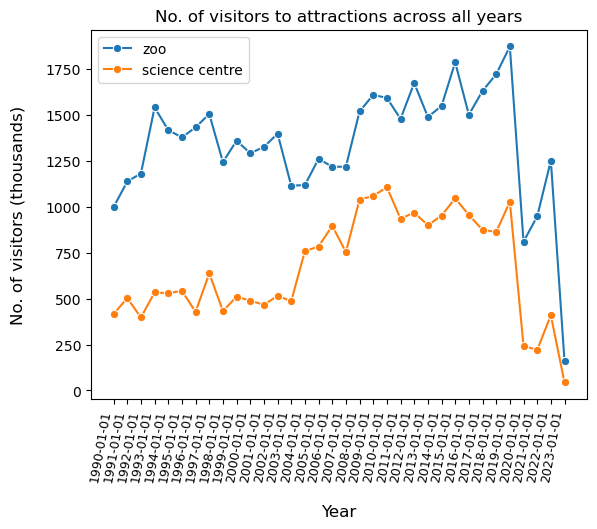

In [42]:
# View Trend of visitors across the years

df_agg = df_new.groupby('year').agg({
    'zoo_visitor_ct': 'sum',
    'sci_centre_visitor_ct': 'sum',
    'total_rainfall': 'sum'
}).reset_index()

# Plot line chart to show number of visitors across the months
sns.lineplot(data = df_agg, x = 'year', y = 'zoo_visitor_ct', marker = 'o', label = 'zoo')
sns.lineplot(data = df_agg, x = 'year', y = 'sci_centre_visitor_ct', marker = 'o', label = 'science centre')


plt.xlabel('Year', fontsize=12, labelpad=15)
plt.ylabel('No. of visitors (thousands)', fontsize=12, labelpad=15)
plt.xticks(df_agg['year'], rotation=80, ha='right', fontsize=9)
plt.title('No. of visitors to attractions across all years')

#### 1b) Cleaning data and dropping rows that were impacted due to Covid

The data set includes number of visitors from 1990 to 2023. However, during the heightened Covid period, tourist attractions, including the Zoo and Science Centre was closed. Hence, there are months where count of visitors is 0 which is undern on-normal conditions and skews the dataset. Hence, I will visualise the number of visitors during 2020 to 2021 to understand which rows need to be dropped.


*Circuit Breaker was from 7 Apr to 4 May 2020


In [43]:
df_new['year'] = pd.to_datetime(df_new['year'], format='%Y')

# Extract just the year number from the 'year' column
df_new['year'] = df_new['year'].dt.year

C:\Users\tiffa\AppData\Local\Temp\ipykernel_157808\3274763547.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tiffa\AppData\Local\Temp\ipykernel_157808\3274763547.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'No. of visitors to attractions during Covid period')

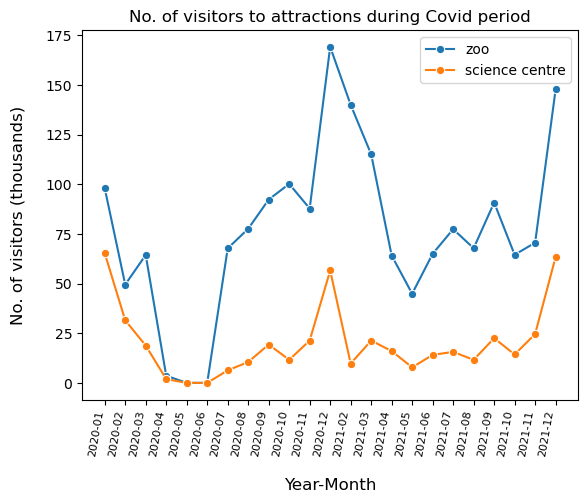

In [44]:
# Filter the DataFrame to only 2020 to 2021, during heightened Covid period
df_covid = df_new[df_new['year_month'].str.contains('2020|2021')]

# Plot line chart to show number of visitors across the months
sns.lineplot(data = df_covid, x = 'year_month', y = 'zoo_visitor_ct', marker = 'o', label = 'zoo')
sns.lineplot(data = df_covid, x = 'year_month', y = 'sci_centre_visitor_ct', marker = 'o', label = 'science centre')


plt.xlabel('Year-Month', fontsize=12, labelpad=15)
plt.ylabel('No. of visitors (thousands)', fontsize=12, labelpad=15)
plt.xticks(df_covid['year_month'], rotation=80, ha='right', fontsize=8)
plt.title('No. of visitors to attractions during Covid period')


In [45]:
# Based on above chart, the no. of visitors for period from Apr 2020 to June 2020 was close to zero, meaning the attractions were closed to public. 
# Based on the above 2 charts, I shall focus on only 2010 to 2019.
# Therefore will drop these rows

df_new = df_new[(df_new['year'] >= 2010) & (df_new['year'] <= 2019)]

# check shape of data 
df_new.shape

(119, 10)

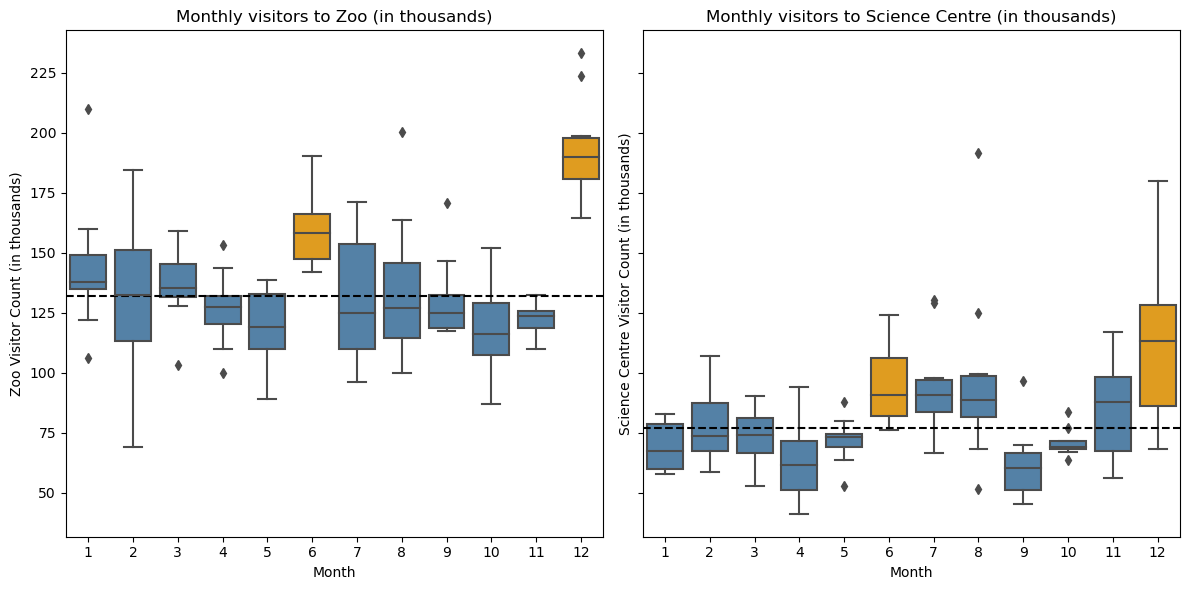

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define a custom color palette
custom_palette = ['steelblue' if (x != 6 and x != 12) else 'orange' for x in df_new['month'].unique()]

# Plot boxplot for zoo visitors
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.boxplot(data=df_new, y="zoo_visitor_ct", x='month', ax=axes[0], palette=custom_palette)
axes[0].axhline(np.median(df_new['zoo_visitor_ct']), color='black', linestyle='--')
axes[0].set_title('Monthly visitors to Zoo (in thousands)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Zoo Visitor Count (in thousands)')

# Plot boxplot for science centre visitors
sns.boxplot(data=df_new, y="sci_centre_visitor_ct", x='month', ax=axes[1], palette=custom_palette)
axes[1].axhline(np.median(df_new['sci_centre_visitor_ct']), color='black', linestyle='--')
axes[1].set_title('Monthly visitors to Science Centre (in thousands)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Science Centre Visitor Count (in thousands)')

plt.tight_layout()
plt.show()


**Conclusion**: The boxplot shows that the median number of visitors for both science centre and zoo in June and December is *above the overall median number* of visitors. This is likely due to two factors:

1) These are school holiday months, when families are more likely to visit the zoo.
2) For June: The weather is typically better, which may also encourage more people to visit.

We will further explore the correlation between number of visitors and weather conditions in the next steps.

### 2) Correlation between different weather variables

#### 2a) No. of visitors vs rainfall

##### Hypothesis Test

Since no. of visitors and rainfall are both continuous variables, I have selected the Pearson correlation to study if there's a correlation between number of rainfall and visitors.

Null Hypothesis Ho: There is no linear relationship between rainfall and number of visitors <br>
Alternative Hypothesis: There is a linear relationship between rainfall and number of visitors <br>
Significance level alpha = 0.05

##### Creating control group without holiday months to see if there is difference in correlation

As shown in boxplot above, the number of visitors in December and June is higher. These are school holiday months, thus a higher number of visitors are expected. Hence it might distort the correlation between weather and visitors. <br>
What if we compare the results of a hypothesis test for data with and without these holiday months?

Zoo: Pearson correlation coefficient is -0.064276, p-value is 0.487380
Zoo (Excl School Holidays): Pearson correlation coefficient is -0.562263, p-value is 0.000000
Science Centre: Pearson correlation coefficient is 0.122608, p-value is 0.184046
Science Centre (Excl School Holidays): Pearson correlation coefficient is -0.038629, p-value is 0.704229


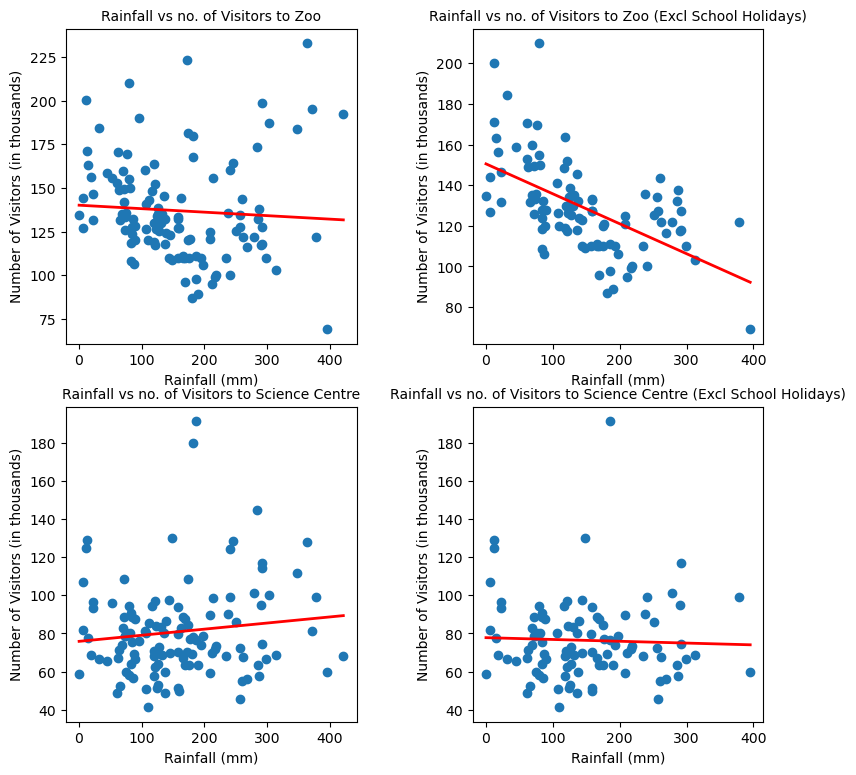

In [47]:
# Filter out the rows where month is 12 or 6 (holiday months)
mask1 = df_new['month'].isin([12, 6])
df_excl = df_new[~mask1]

# Calculate Pearson correlation and p-values for zoo and science centre
data_sets = [
    (df_new, 'Zoo'),
    (df_excl, 'Zoo (Excl School Holidays)'),
    (df_new, 'Science Centre'),
    (df_excl, 'Science Centre (Excl School Holidays)')
]

correlation_results = []

# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(9, 9))
plt.subplots_adjust(wspace=0.4)

for i, (df, title) in enumerate(data_sets):
    x_col, y_col = 'total_rainfall', 'zoo_visitor_ct' if 'Zoo' in title else 'sci_centre_visitor_ct'
    correlation_coefficient, p_value = stats.pearsonr(df[x_col], df[y_col])
    correlation_results.append((correlation_coefficient, p_value))
    
    fig = px.scatter(df, x=x_col, y=y_col, trendline='ols', title=f'Rainfall vs no. of Visitors to {title}',
                     labels={x_col: 'Rainfall', y_col: 'Number of Visitors'})
    fig.update_layout(showlegend=False)
    fig.update_traces(marker=dict(size=8), selector=dict(mode='markers'))
    
    # Plot the scatter plot on the corresponding subplot
    subplot_row, subplot_col = i // 2, i % 2
    axs[subplot_row, subplot_col].plot(fig.data[0]['x'], fig.data[0]['y'], 'o', markersize=6)
    axs[subplot_row, subplot_col].plot(fig.data[1]['x'], fig.data[1]['y'], '-', linewidth=2, color='red')
    axs[subplot_row, subplot_col].set_xlabel('Rainfall (mm)')
    axs[subplot_row, subplot_col].set_ylabel('Number of Visitors (in thousands)')
    axs[subplot_row, subplot_col].set_title(f'Rainfall vs no. of Visitors to {title}', fontsize = 10)

# Display the correlation coefficients and p-values
for (corr, p_val), title in zip(correlation_results, [x[1] for x in data_sets]):
    print(f"{title}: Pearson correlation coefficient is {corr:.6f}, p-value is {p_val:.6f}")

plt.show()


Interestingly, when Holiday months (June and December) are removed, the negative correlation between rainfall and zoo visitor becomes stronger and changes to become signficant (as p-value < 0.05), while the relationship between rainfall and science centre visitors did not change much. 
<br> This could be because because majority of the zoo is outdoors, hence rainfall has a greater impact on visitor's decision not to visit the zoo.

##### Based on above analysis, let's narrow down the scope of project to focus on Zoo visitors vs Total Rainfall (excluding School Holidays)

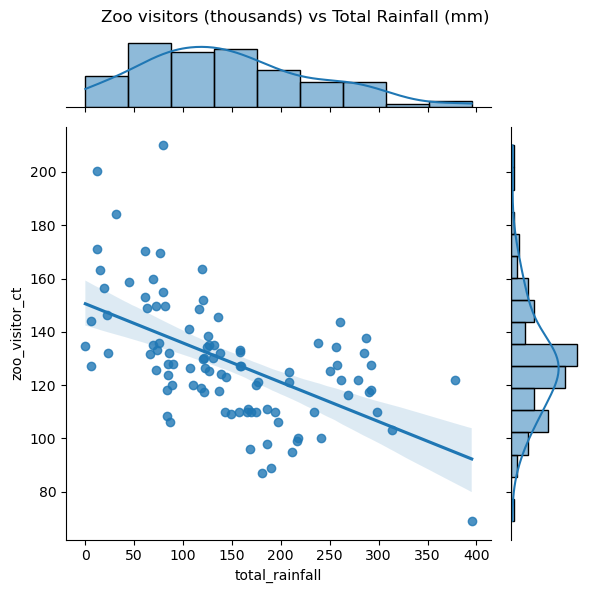

In [48]:
p = sns.jointplot(data=df_excl, x=df_excl.total_rainfall, y=df_excl.zoo_visitor_ct,kind="reg")
p.fig.suptitle("Zoo visitors (thousands) vs Total Rainfall (mm)")
p.fig.tight_layout()

# push down plot to make space for title
p.fig.subplots_adjust(top=0.93)



In [49]:
# Let's use Ordinary Least Squares (OLS) regression in statsmodels to see the correlation between zoo visitor count and total rainfall
X = df_excl['total_rainfall']
y = df_excl['zoo_visitor_ct']

X_stat = sm.add_constant(X)
results = modelsm = sm.OLS(y, X_stat).fit()
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  const             150.537373
total_rainfall     -0.147536
dtype: float64
R2:  0.31614002287257303


In [50]:
modelsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         zoo_visitor_ct   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     44.84
Date:                Fri, 04 Aug 2023   Prob (F-statistic):           1.39e-09
Time:                        13:10:05   Log-Likelihood:                -430.13
No. Observations:                  99   AIC:                             864.3
Df Residuals:                      97   BIC:                             869.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            150.5374      3.738     40.269      0.000     143.118     157.957
total_rainfall    -0.1475      0.022     -6.696      0.000      -0.191      -0.104
==============================================================================
Omnibus:                       13.354   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.308
Skew:                           0.757   Prob(JB):                     0.000474
Kurtosis:                       4.191   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

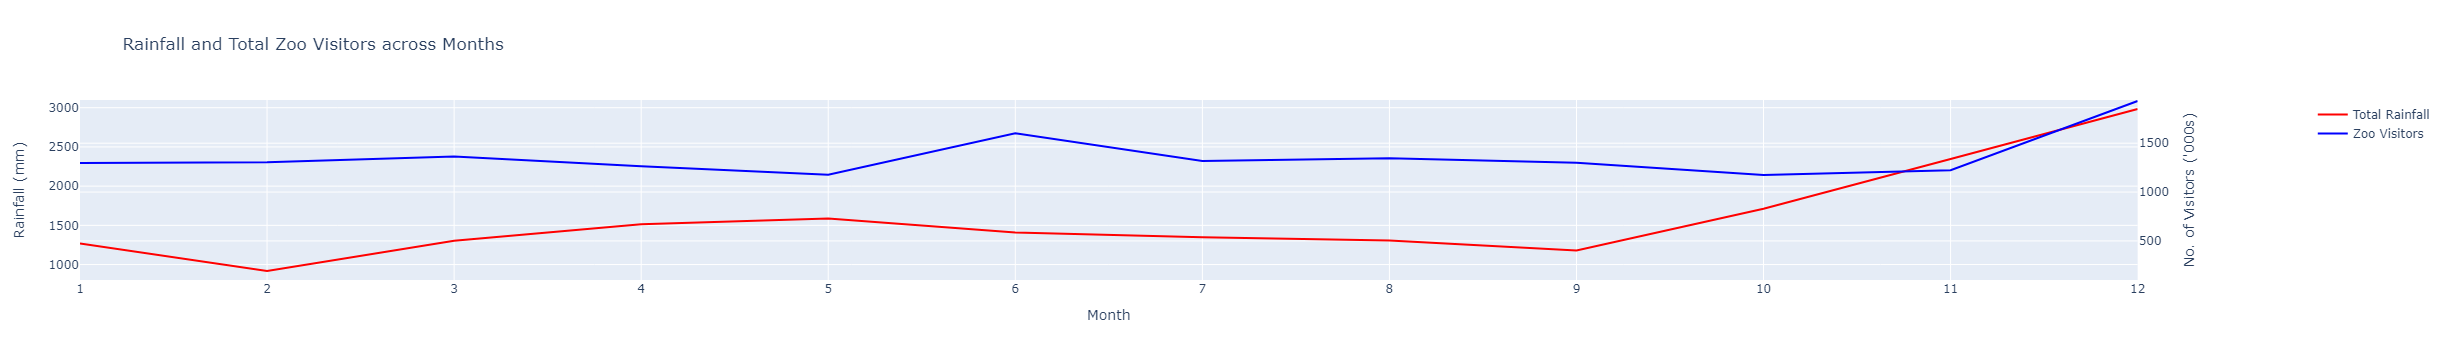

In [51]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group the data by month and calculate the median of rainfall and zoo visitors
df_grouped = df_new.groupby('month').agg({
    'total_rainfall': 'sum',
    'zoo_visitor_ct': 'sum',
}).reset_index()

# Create subplots with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the rainfall line trace to the first y-axis
fig.add_trace(go.Scatter(x=df_grouped['month'], y=df_grouped['total_rainfall'],
                         mode='lines', line=dict(color='red'), name='Total Rainfall'),
              secondary_y=False)

# Add the zoo visitor count line trace to the second y-axis
fig.add_trace(go.Scatter(x=df_grouped['month'], y=df_grouped['zoo_visitor_ct'],
                         mode='lines', line=dict(color='blue'), name='Zoo Visitors'),
              secondary_y=True)

# Set the range for the secondary y-axis to start from 0
fig.update_layout(title="Rainfall and Total Zoo Visitors across Months",
                  xaxis_title="Month",
                  yaxis_title="Rainfall (mm)",
                  yaxis2_title="No. of Visitors ('000s)",  # Secondary y-axis title
                  xaxis_dtick='M2',
                  yaxis2=dict(range=[100, df_grouped['zoo_visitor_ct'].max() + 10]))  # Adjust the range as needed

# Show the plot
fig.show()


#### 2b) Mean Daily Temperature vs No. of Visitors to attractions


Now, let's explore other weather variables. We will study the correlation between mean daily temperature and the number of visitors to the attractions.

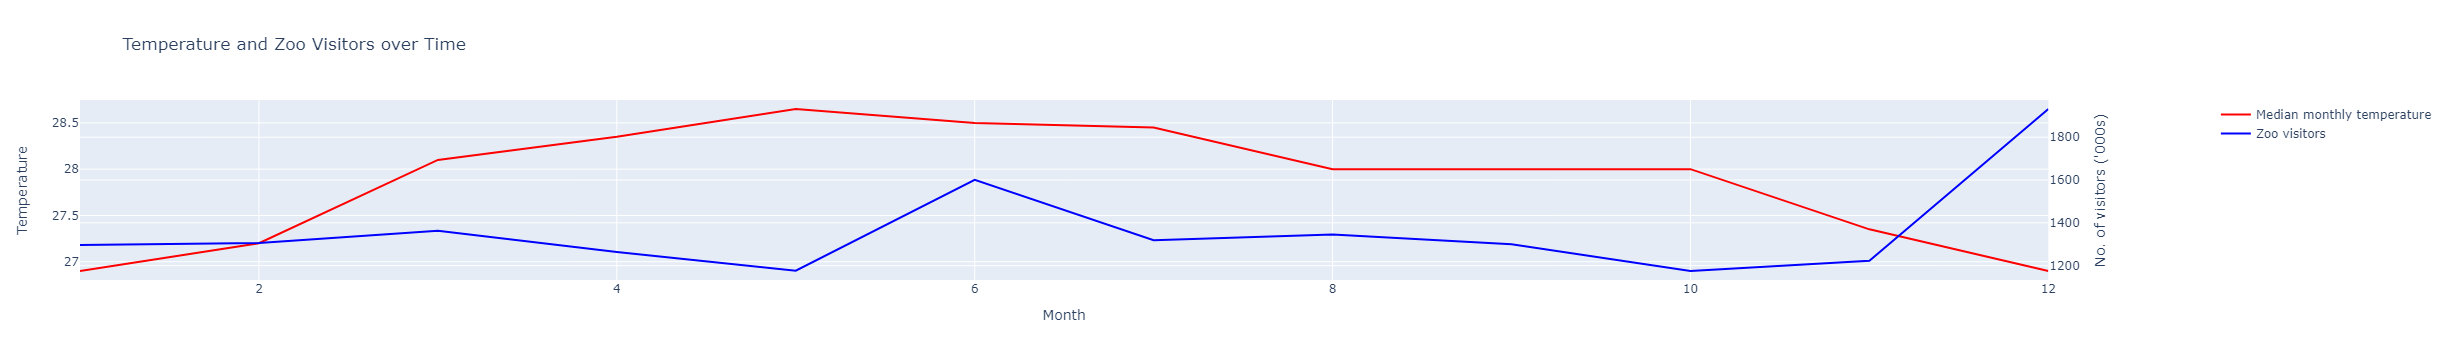

In [52]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group the data by month and calculate the median temperature and visitors
df_grouped = df_new.groupby('month').agg({
    'mean_temp': 'median',
    'zoo_visitor_ct': 'sum'
}).reset_index()

# Create subplots with two y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add the temperature line trace to the first y-axis
fig.add_trace(go.Scatter(x=df_grouped['month'], y=df_grouped['mean_temp'],
                         mode='lines', line=dict(color='red'), name='Median monthly temperature'),
              secondary_y=False)

# Add the zoo visitor count line trace to the second y-axis
fig.add_trace(go.Scatter(x=df_grouped['month'], y=df_grouped['zoo_visitor_ct'],
                         mode='lines', line=dict(color='blue'), name='Zoo visitors'),
              secondary_y=True)


fig.update_layout(title="Temperature and Zoo Visitors over Time",
                  xaxis_title="Month",
                  yaxis_title="Temperature",
                  yaxis2_title="No. of visitors ('000s)")



Since both temperature and number of visitors are continuous data, I have selected the *Pearson correlation coefficient* which is a measure of linear relationship between the two variables.

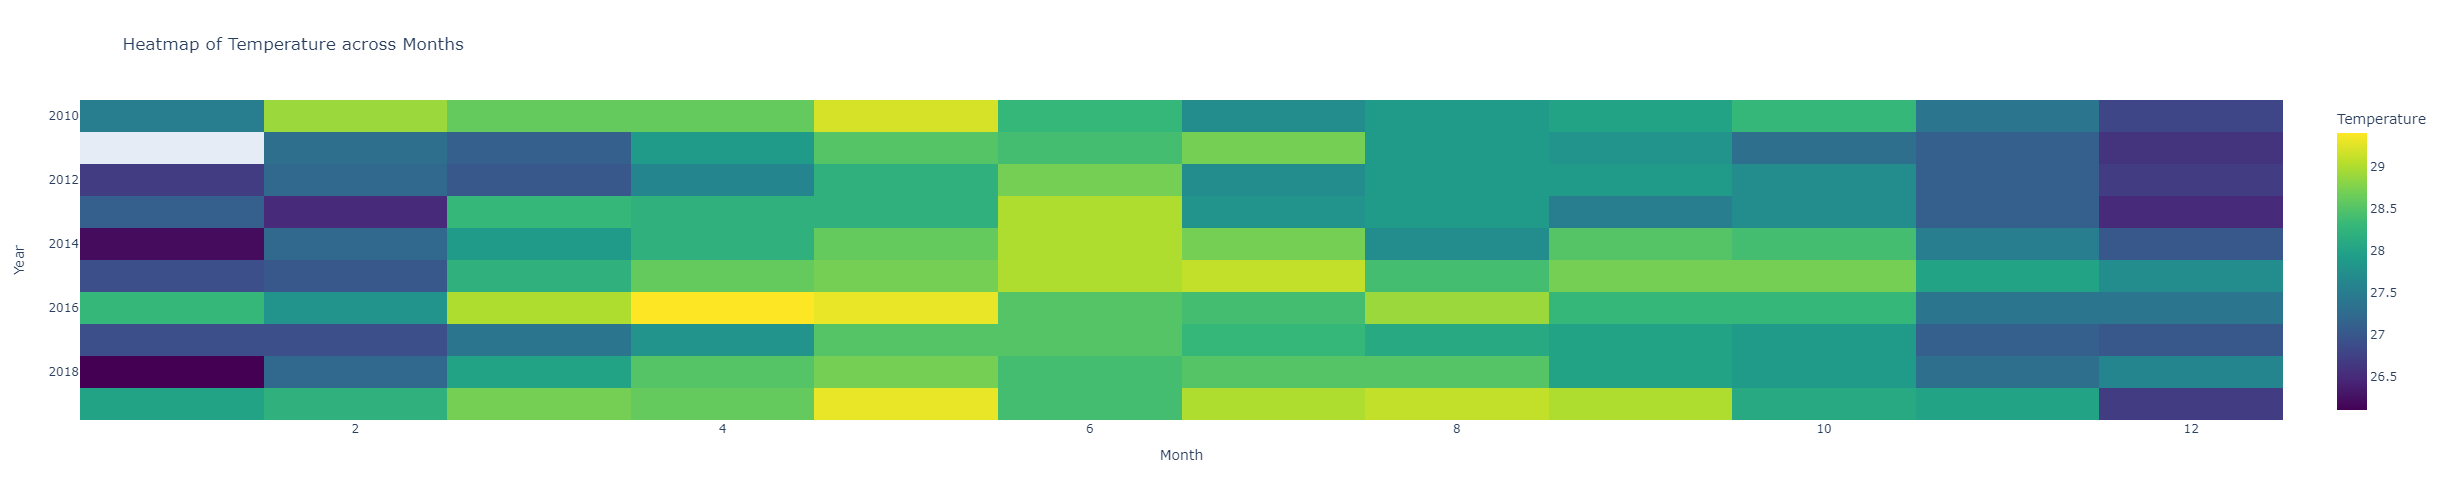

In [53]:
# First, unstack the dataframe
df_cross = df_new.set_index(['year','month'])['mean_temp'].unstack()

fig = px.imshow(df_cross, height=500, aspect='auto', color_continuous_scale='viridis', 
                title="Heatmap of Temperature across Months")

# Set the axis labels
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Year')
fig.update_layout(coloraxis_colorbar=dict(title="Temperature"))

We can see that the start and end of year is more cooling, with lower minimum daily temperatures. The middle part of the year, between May to Aug gets hotter. Will this affect number of visitors? Let's plot a line chart to observe the trends:

We shall conduct another Hypothesis test if the relationship between temperature and number of visitors is signficant. Again, since these are continuous variables, we will use Pearson's correlation.
<br> Null Hypothesis Ho: There is no linear relationship between temperature and number of visitors 
<br> Alternative Hypothesis: There is a linear relationship between temperature and number of visitors

a) Hypothesis Testing for Temperature vs Visitors to Zoo

Zoo: p-value is 0.3995, more than critical value of 0.05, hence there is no significant relationship between temperature and the number of visitors.
Science Centre: p-value is 0.0376, less than critical value of 0.05, hence there is a significant relationship between temperature and the number of visitors.


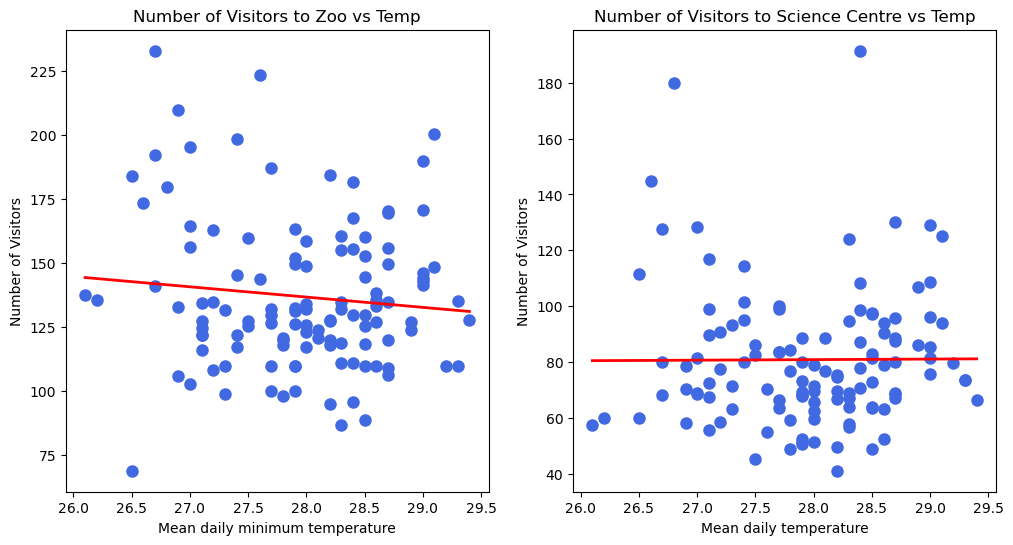

In [54]:
# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
alpha = 0.05

# Scatter plot for zoo
correlation_coefficient_zoo, p_value_zoo = stats.pearsonr(df_excl['mean_temp'], df_excl['zoo_visitor_ct'])

if p_value_zoo < alpha:
    print(f"Zoo: p-value is {round(p_value_zoo,4)}, less than critical value of 0.05, hence there is a significant relationship between temperature and the number of visitors.")
else:
    print(f"Zoo: p-value is {round(p_value_zoo,4)}, more than critical value of 0.05, hence there is no significant relationship between temperature and the number of visitors.")

fig_zoo = px.scatter(df_new, x='mean_temp', y='zoo_visitor_ct', trendline='ols',
                     labels={'temp_mean_daily_min': 'Mean daily temperature', 'zoo_visitor_ct': 'Number of Visitors'})
fig_zoo.update_layout(showlegend=False)
fig_zoo.update_traces(marker=dict(size=10), selector=dict(mode='markers'))
axs[0].plot(fig_zoo.data[0]['x'], fig_zoo.data[0]['y'], 'o', markersize=8, color='royalblue')
axs[0].plot(fig_zoo.data[1]['x'], fig_zoo.data[1]['y'], '-', linewidth=2, color='red')
axs[0].set_xlabel('Mean daily minimum temperature')
axs[0].set_ylabel('Number of Visitors')
axs[0].set_title('Number of Visitors to Zoo vs Temp')

# Scatter plot for science centre
correlation_coefficient_sci, p_value_sci = stats.pearsonr(df_excl['mean_temp'], df_excl['sci_centre_visitor_ct'])

if p_value_sci < alpha:
    print(f"Science Centre: p-value is {round(p_value_sci,4)}, less than critical value of 0.05, hence there is a significant relationship between temperature and the number of visitors.")
else:
    print(f"Science Centre: p-value is {round(p_value_sci,4)}, more than critical value of 0.05, hence there is no significant relationship between temperature and the number of visitors.")

fig_sci = px.scatter(df_new, x='mean_temp', y='sci_centre_visitor_ct', trendline='ols',
                     labels={'mean_temp': 'Mean daily temperature', 'sci_centre_visitor_ct': 'Number of Visitors'})
fig_sci.update_layout(showlegend=False)
fig_sci.update_traces(marker=dict(size=10), selector=dict(mode='markers'))
axs[1].plot(fig_sci.data[0]['x'], fig_sci.data[0]['y'], 'o', markersize=8, color='royalblue')
axs[1].plot(fig_sci.data[1]['x'], fig_sci.data[1]['y'], '-', linewidth=2, color='red')
axs[1].set_xlabel('Mean daily temperature')
axs[1].set_ylabel('Number of Visitors')
axs[1].set_title('Number of Visitors to Science Centre vs Temp')

plt.show()


Overall, there does not seem to be any clear trend.

#### 2c) Mean Sunshine Hours vs No. of Visitors to attractions


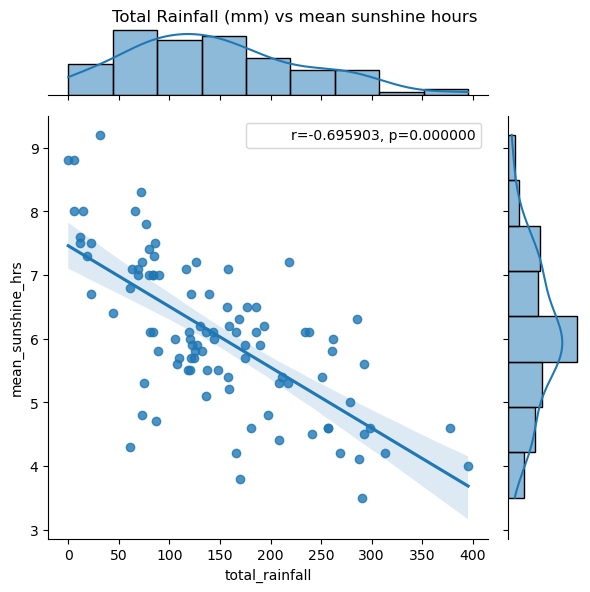

In [55]:
p = sns.jointplot(data=df_excl, x=df.total_rainfall, y=df.mean_sunshine_hrs,kind="reg")
p.fig.suptitle("Total Rainfall (mm) vs mean sunshine hours")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

r, pval = stats.pearsonr(x=df_excl.total_rainfall, y=df_excl.mean_sunshine_hrs)
# if you choose to write your own legend, then you should adjust the properties then
phantom, = p.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

p.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,pval)])

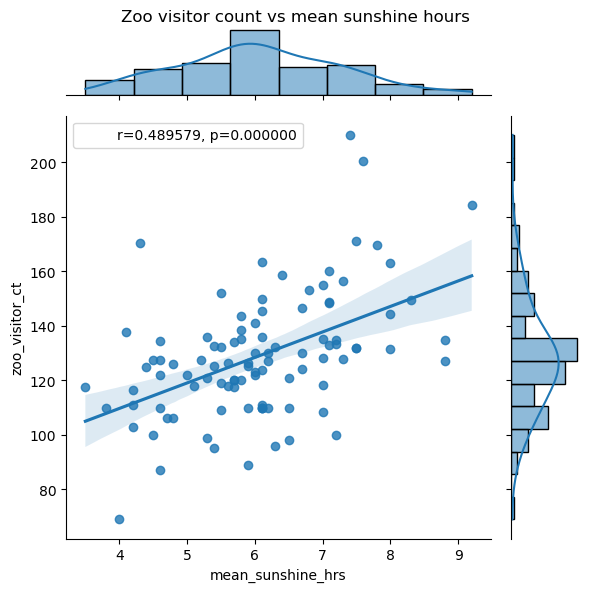

In [56]:
p = sns.jointplot(data=df_excl, x=df.mean_sunshine_hrs, y=df.zoo_visitor_ct,kind="reg")
p.fig.suptitle("Zoo visitor count vs mean sunshine hours")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

r, pval = stats.pearsonr(x=df_excl.mean_sunshine_hrs, y=df_excl.zoo_visitor_ct)
# if you choose to write your own legend, then you should adjust the properties then
phantom, = p.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

p.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,pval)])

As expected, there is a positive correlation between total rainfall and mean sunshine hours, and therefore a positive correlation between mean sunshine hours and number of visitors. Hence, sunshine hours can potentially be a predictor for the number of visitors to the zoo.

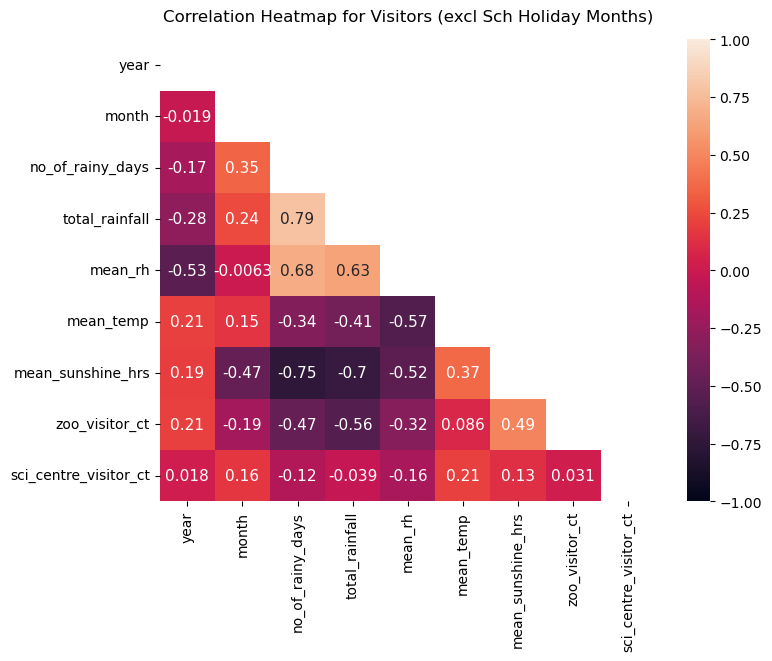

In [57]:
f, ax = plt.subplots(figsize=(8, 6))
mask = np.triu(np.ones_like(df_excl.corr(numeric_only=True), dtype=np.bool_))
heatmap = sns.heatmap(df_excl.corr(numeric_only=True), mask=mask, vmin=-1, vmax=1, annot=True,
                      annot_kws={"size": 11}) 
heatmap.set_xlabel(heatmap.get_xlabel(), fontsize=7)
heatmap.set_ylabel(heatmap.get_ylabel(), fontsize=7)
heatmap.set_title('Correlation Heatmap for Visitors (excl Sch Holiday Months)', fontdict={'fontsize': 12}, pad=13)


plt.show()

## Limitations

1. **Black Swan Events**: Covid-19 resulted in a closure of tourist attractions across Singapore, slow economic recovery and limited global travel resulting in lower number of visitors and distorting the data . Covid period was removed from dataset, but might have long term effects
2. **Marketing Efforts and Campaigns**: Successful marketing efforts might have the potential to influence visitors despite bad weather. There were not accounted for in data

## Conclusions and Recommendations

### Conclusions
1. There is a **strong negative correlation between total rainfall and no. of visitors to the zoo**. This correlation is more significant than with the no. of visitors to science centre. This is expected as the zoo is considered as an outdoor attraction, and rainy weather discourages outdoor activties.
2. The negative correlation between amount of rainfall and no. of visitors to the zoo becomes **stronger when holiday months are removed**. Removing holiday months strengthens the negative rainfall-visitor correlation, implying that holidays may mitigate the impact of bad weather. This is probably due to local school holidays (which increases availability of people)  and increase in number of tourists*, hence footfall to the zoo remain high.
3. **Positive Correlation between Mean sunshine hours and visitors to the Zoo**: Mean sunshine hours positively correlate with zoo visitors, as more sunshine increases the likelihood of outdoor attraction availability.


*https://stan.stb.gov.sg/public/sense/app/877a079c-e05f-4871-8d87-8e6cc1963b02/sheet/3df3802e-2e5b-4c79-950d-d7265c4c07a9/state/analysis

### Recommendations
1. **Focus on optimising Manpower at Zoo**: STB should prioritize manpower optimization at Singapore Zoo over the Science Centre, considering 1) the strong correlation between total rainfall and zoo visitors (excluding school holiday months) and 2) the number of visitors to the zoo is much higher (2.5X) of visitors to science centre

2. **Adjust Staffing during months with higher rainfall**: Months with higher rainfall generally see less visitors at Singapore Zoo. Therefore, STB could reduce the number of staff on shift in these months to optimise Expenditure on Manpower. 

3. **Reduce Outdoor Shows during Wet Months**: Reduce the frequency of outdoor shows as they require specialised trainers who are expensive

4. **Leverage Technology to Supplement Staff**: For drier months and holiday months with higher number of visitors, STB can leverage technology to empower our staff (such as digitisation of ticket countering, employing robot navigators that can be deployed as per demand). This technology can be deployed on demand, without needing to increase staff on shift.

5. **Next Steps**: To further optimise manpower expenses using rainfall / weather data, can repeat the same study for other outdoor attractions